

---


## **Machine Learning May Minor Project**

---



In [19]:
#Importing all Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
#loading the dataframe
df=pd.read_csv("/content/50_Startups.csv")
df


In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
#EDA using Pandas. Information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [23]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [24]:
#Preprocessing/Filtering Data
numeric_df=df.select_dtypes(include=['int64','float64'])
numeric_df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [25]:
#Seprating input and output Data
x=numeric_df.iloc[:,0:3]
y=numeric_df.iloc[:,3]

In [26]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [27]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [28]:
# TRAIN TEST SPLIT on the Inputs and Outputs
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [29]:
#model initialization
model=LinearRegression()

In [30]:
#Model Training
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

In [32]:
#Comparing Y_test v/s Y
df_new=pd.DataFrame({"Y_Test":y_test,"Y_pred":y_pred})
df_new

,Y_Test,Y_pred
28,103282.38,100741.330763
46,49490.75,56435.610489
7,155752.60,159846.599586
41,77798.83,75035.624011
36,90708.19,75177.293486
29,101004.64,101149.008888
21,111313.02,117089.725673
48,35673.41,49400.160823
19,122776.86,114703.786068
8,152211.77,151522.317444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


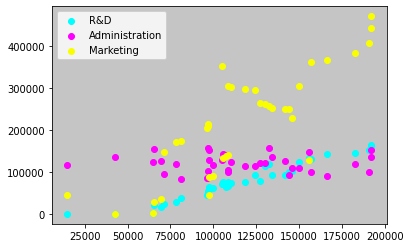

In [42]:
plt.scatter(y_train,x_train.iloc[:,0],c='#00ffff',label="R&D")
plt.scatter(y_train,x_train.iloc[:,1],c='#ff00ff',label="Administration")
plt.scatter(y_train,x_train.iloc[:,2],c='#f9ff00',label="Marketing")

ax = plt.axes()
ax.set_facecolor("#C5C5C5")

plt.legend()
plt.show()

In [35]:
#Checking the accuracy of the Code
r2_score(y_test,y_pred)

0.949437498799158